**File reading**
***

In [27]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('docs/simpsons_dataset.csv').dropna()

# imprima las primeras 5 filas
df.head()

#Cambiamos las etiquetas texutales por etiquetas numericas, esto es una buena practica cuando se construyen modelo supervisados
# df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [34]:
import gzip
import gensim
import logging

### BOW

In [35]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

In [36]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [37]:
documents = df['proccesed'].to_numpy()

In [39]:
model_skipgram = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10, sg=1)
model_skipgram.train(documents,total_examples=len(documents),epochs=10)

TypeError: __init__() got an unexpected keyword argument 'size'

In [11]:
model_skipgram.save("word2vec150.model")

In [14]:
print(model_skipgram.wv['morning'])

[ 0.48093364 -0.11120161 -0.19962901 -0.22844873  0.45902824 -0.2711622
 -0.2677558  -0.18262312  0.23664664 -0.3030019  -0.38875455  0.02917125
 -0.02349757 -0.49126995  0.37962243 -0.18414031 -0.77610195  0.20034058
 -0.6411673   0.04474456 -0.46160638  0.6284778  -0.38707048  0.1548561
  0.10495966 -0.02089402  0.05490276 -0.40026447  0.32078347 -0.42050144
  0.26828906  0.2650062   0.067035    0.11841341 -0.01867171  0.09910592
  0.70613974 -0.04430321 -0.30474493 -0.47344017  0.16396135 -0.19581515
  0.11617305  0.45195156 -0.02824962  0.36888537  0.09054059  0.30672282
 -0.43285945 -0.20884489 -0.59735817 -0.11812198 -0.00536526  0.20927288
  0.1955856   0.11531454  0.01131231  0.02966101  0.10341604 -0.0827118
 -0.34656137 -0.2407804   0.07351422  0.01370372 -0.4112105   0.27754048
 -0.20136073  0.37504295  0.19595529 -0.20625554 -0.02654775 -0.17900413
  0.03855534  0.27850956 -0.00880319 -0.05408399  0.1642144  -0.22453512
  0.01445079  0.3805854   0.09779879 -0.06867129 -0.40

In [18]:
model_100 = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9562854, 12451860)

In [19]:
model_100.save("word2vec100.model")

In [21]:
print(model_100.wv['morning'])

100


In [32]:
model_50 = gensim.models.Word2Vec(documents, size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents,total_examples=len(documents),epochs=10)

TypeError: __init__() got an unexpected keyword argument 'size'

In [24]:
model_50.save("word2vec50.model")


In [25]:
df.shape

(131853, 3)

## Read


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:

model50 = gensim.models.Word2Vec.load("word2vec50.model")
model100 = gensim.models.Word2Vec.load("word2vec100.model")
model150 = gensim.models.Word2Vec.load("word2vec150.model")

In [13]:
model50.wv.similar_by_word('homer')

[('marge', 0.757165789604187),
 ('fonzie', 0.7224231362342834),
 ('simpson', 0.6605160236358643),
 ('dyslexia', 0.6507477164268494),
 ('pssst', 0.646972119808197),
 ('hitchhiker', 0.6374999284744263),
 ('genes', 0.635238766670227),
 ('flawlessly', 0.6348787546157837),
 ('incorrigible', 0.6278330683708191),
 ('teammate', 0.6263568997383118)]

In [23]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

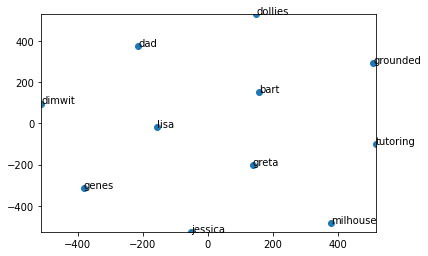

In [40]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)